# Case Study : Recommendation on Smart Phones

CONTEXT: 
India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice. 
• DATA DESCRIPTION: 
• author : name of the person who gave the rating 
• country : country the person who gave the rating belongs to 
• data : date of the rating 
• domain: website from which the rating was taken from 
• extract: rating content 
• language: language in which the rating was given 
• product: name of the product/mobile phone for which the rating was given 
• score: average rating for the phone 
• score_max: highest rating given for the phone 
• source: source from where the rating was taken  

• PROJECT OBJECTIVE: We will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively.. 

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading Data files
rev1 = pd.read_csv('../input/recommendation-system/phone_user_review_file_1.csv', encoding='iso-8859-1')
rev2 = pd.read_csv('../input/recommendation-system/phone_user_review_file_2.csv', encoding='iso-8859-1')
rev3 = pd.read_csv('../input/recommendation-system/phone_user_review_file_3.csv', encoding='iso-8859-1')
rev4 = pd.read_csv('../input/recommendation-system/phone_user_review_file_4.csv', encoding='iso-8859-1')
rev5 = pd.read_csv('../input/recommendation-system/phone_user_review_file_5.csv', encoding='iso-8859-1')
rev6 = pd.read_csv('../input/recommendation-system/phone_user_review_file_6.csv', encoding='iso-8859-1')   

In [ ]:
rev1.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/
date,5/2/2017,4/28/2017,5/4/2017,5/2/2017,5/11/2017
lang,en,en,en,en,en
country,us,us,us,us,us
source,Verizon Wireless,Phone Arena,Amazon,Samsung,Verizon Wireless
domain,verizonwireless.com,phonearena.com,amazon.com,samsung.com,verizonwireless.com
score,10,10,6,9.2,4
score_max,10,10,10,10,10
extract,As a diehard Samsung fan who has had every Sam...,Love the phone. the phone is sleek and smooth ...,Adequate feel. Nice heft. Processor's still sl...,Never disappointed. One of the reasons I've be...,I've now found that i'm in a group of people t...
author,CarolAnn35,james0923,R. Craig,Buster2020,S Ate Mine


In [ ]:
rev2.head().T

,0,1,2,3,4
phone_url,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/
date,4/15/2015,5/23/2015,4/27/2015,4/22/2015,4/18/2015
lang,en,en,en,en,en
country,us,gb,gb,gb,gb
source,Amazon,Amazon,Amazon,Amazon,Amazon
domain,amazon.com,amazon.co.uk,amazon.co.uk,amazon.co.uk,amazon.co.uk
score,2,10,8,10,10
score_max,10,10,10,10,10
extract,"The telephone headset is of poor quality , not...",This is my first smartphone so I have nothing ...,Great phone. Battery life not great but seems ...,Best 90 quid I've ever spent on a smart phone,I m happy with this phone.it s very good.thx team
author,luis,Mark Lavin,tracey,Reuben Ingram,viorel


In [ ]:
rev3.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/
date,11/7/2015,10/2/2015,9/2/2015,9/2/2015,9/1/2015
lang,pt,pt,pt,pt,pt
country,br,br,br,br,br
source,Submarino,Submarino,Submarino,Submarino,Colombo
domain,submarino.com.br,submarino.com.br,submarino.com.br,submarino.com.br,colombo.com.br
score,6,10,10,8,8
score_max,10,10,10,10,10
extract,"recomendo, eu comprei um, a um ano, e agora co...",Comprei um pouco desconfiada do site e do celu...,"Muito bom o produto, obvio que tem versÃµes me...",Unica ressalva fica para a camera que poderia ...,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...
author,herlington tesch,Luisa Silva Marieta,Cyrus,Marcela Santa Clara Brito,Claudine Maria Kuhn Walendorff


In [ ]:
rev4.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/
date,3/11/2015,17/11/2015,29/10/2015,29/10/2015,29/10/2015
lang,en,en,en,en,en
country,us,in,in,in,in
source,Amazon,Zopper,Amazon,Amazon,Amazon
domain,amazon.com,zopper.com,amazon.in,amazon.in,amazon.in
score,2,10,4,6,10
score_max,10,10,10,10,10
extract,was not conpatable with my phone as stated. I ...,Decent Functions and Easy to Operate Pros:- Th...,Not Good Phone such price. Hang too much and v...,not bad for features,Excellent product
author,Frances DeSimone,Expert Review,Amazon Customer,Amazon Customer,NHK


In [ ]:
rev5.head().T

,0,1,2,3,4
phone_url,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/
date,7/13/2016,7/13/2016,7/13/2016,4/25/2014,4/23/2013
lang,en,en,en,en,en
country,in,in,in,in,in
source,91 Mobiles,91 Mobiles,91 Mobiles,Naaptol,Naaptol
domain,91mobiles.com,91mobiles.com,91mobiles.com,naaptol.com,naaptol.com
score,2,6,4,10,10
score_max,10,10,10,10,10
extract,I bought 1 month before. currently speaker is ...,"I just bought one week back, I have Airtel con...",one problem in this handset opera is not worki...,here Karbonn comes up with an another excellen...,"What a phone, all so on Naaptol my god 23% off..."
author,venkatesh,Venkat,krrish,BRIJESH CHAUHAN,Suraj CHAUHAN


In [ ]:
rev6.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/
date,9/16/2011,2/13/2014,12/30/2011,10/18/2008,9/6/2008
lang,en,en,en,en,en
country,us,us,us,us,us
source,Phone Arena,Amazon,Phone Scoop,HandCellPhone,Reviewed.com
domain,phonearena.com,amazon.com,phonescoop.com,handcellphone.com,reviewed.com
score,8,6,9,4,6
score_max,10,10,10,10,10
extract,I've had the phone for awhile and it's a prett...,to be clear it is not the sellers fault that t...,Well i love this phone. i have had ton of phon...,I have had my Instinct for several months now ...,i have had this instinct phone for about two m...
author,ajabrams95,Stephanie,snickers,A4C,betaBgood


In [ ]:
rev1.shape

(374910, 11)

In [ ]:
rev2.shape

(114925, 11)

In [ ]:
rev3.shape

(312961, 11)

In [ ]:
rev4.shape

(98284, 11)

In [ ]:
rev5.shape

(350216, 11)

In [ ]:
rev6.shape

(163837, 11)

In [ ]:
# 1a. Merge the provided CSVs into one data-frame. 
rev_f = pd.concat([rev1,rev2,rev3,rev4,rev5,rev6],axis=0)

In [ ]:
rev_copy = rev_f.copy()

In [ ]:
#Checking training dataset attributes datatypes 
rev_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


All columns are objects except score and score_max which are floating point.

In [ ]:
# 1b. Check a few observations and shape of the data-frame.
rev_f.shape

(1415133, 11)

In [ ]:
rev_f.describe()

,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


Standard deviation from the mean score of 8 is 2.616121e+00

In [ ]:
#check for missing values
rev_f.isnull().values.any() # If there are any null values in data set

True

In [ ]:
null_counts = rev_f.isnull().sum()  # This prints the columns with the number of null values they have
print (null_counts)

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64


In [ ]:
# 1d. Check for missing values. Impute the missing values if there is any. 
# filling the null values in column 'score' and 'score_max' 
rev_f = rev_f.fillna(rev_f.median())

# dropping the null values in columns 'extract' ,'author' and 'product'
rev_f = rev_f.dropna()

In [ ]:
# 1c. Round oﬀ scores to the nearest integers. 
rev_f['score'] = rev_f['score'].astype(int) 
rev_f['score_max'] = rev_f['score_max'].astype(int) 

In [ ]:
rev_f.shape

(1336416, 11)

In [ ]:
# 1e. Check for duplicate values and remove them if there is any. 
rev_d = rev_f.drop_duplicates()

In [ ]:
# 1g. Drop irrelevant features. Keep features like Author, Product, and Score. 
# we can drop phone_url,date,lang,country,source,domain and extract since they do not contribute in deciding popularity.  
rev_d.drop(['phone_url','date','lang','country','source','domain','score_max','extract'], axis = 1, inplace = True)

In [ ]:
rev_vs = rev_d.copy()

In [ ]:
rev_d.shape

(1331600, 3)

In [ ]:
# 1f. Keep only 1000000 data samples. Use random state=612
df = rev_d.sample(n=1000000, random_state=612)

In [ ]:
# 2a. Identify the most rated features.
#sorting on products that got highest mean score
df.groupby('product')['score'].mean().sort_values(ascending=False).head()  

product
Nokia 5310 Xpress Music, sakura red sim-free unbranded kein Vertrag    10.0
Oppo Find 5 X909 16 Gb White Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½                          10.0
Sony Ericsson W880i Prepay Mobile Phone On Orange                      10.0
Huawei Mobiltelefoner Mate 8 Dual SIM 32GB                             10.0
Huawei NOVA 4G MYSTIC SILVER                                           10.0
Name: score, dtype: float64

In [ ]:
# 2 b. Identify the users with most number of reviews. 
(df['author'].value_counts()).head()

Amazon Customer    57765
Cliente Amazon     14564
e-bit               6309
Client d'Amazon     5720
Amazon Kunde        3624
Name: author, dtype: int64

In [ ]:
# The product that got most number of reviews.
df['product'].value_counts().head()

Lenovo Vibe K4 Note (White,16GB)     3908
Lenovo Vibe K4 Note (Black, 16GB)    3234
OnePlus 3 (Graphite, 64 GB)          3128
OnePlus 3 (Soft Gold, 64 GB)         2643
Huawei P8lite zwart / 16 GB          1994
Name: product, dtype: int64

In [ ]:
# extracting authors who gave greater than 50 ratings
df1 = pd.DataFrame(columns=['author', 'a_count'])
df1['author']=df['author'].value_counts().index.tolist() 
df1['a_count'] = list(df['author'].value_counts() > 50)

In [ ]:
# get names of indexes for which count column value is False
index_names = df1[ df1['a_count'] == False ].index 
# drop these row indexes from dataFrame 
df1.drop(index_names, inplace = True) 
df1

,author,a_count
0,Amazon Customer,True
1,Cliente Amazon,True
2,e-bit,True
3,Client d'Amazon,True
4,Amazon Kunde,True
...,...,...
674,Alexis,True
675,ugurcam,True
676,missing,True
677,Jens,True


In [ ]:
# extracting product that got more than 50 ratings
df2 = pd.DataFrame(columns=['product', 'p_count'])
df2['product']=df['product'].value_counts().index.tolist() 
df2['p_count'] = list(df['product'].value_counts() > 50)

In [ ]:
# get names of indexes for which count column value is False
index_names = df2[ df2['p_count'] == False ].index 
# drop these row indexes from dataFrame 
df2.drop(index_names, inplace = True)

In [ ]:
df2

,product,p_count
0,"Lenovo Vibe K4 Note (White,16GB)",True
1,"Lenovo Vibe K4 Note (Black, 16GB)",True
2,"OnePlus 3 (Graphite, 64 GB)",True
3,"OnePlus 3 (Soft Gold, 64 GB)",True
4,Huawei P8lite zwart / 16 GB,True
...,...,...
4341,"Nokia Lumia 735 Smartphone, 8 GB, Verde [Italia]",True
4342,"Microsoft Nokia 5140i schwarz (GSM, VGA-Kamera...",True
4343,Samsung Galaxy S6 Edge G925a 64GB Unlocked GSM...,True
4344,Samsung S5233W STAR Wi - Fi CEP TELEFONU,True


In [ ]:
# selecting data rows where product is having more than 50 ratings.  
df3 = df[df['product'].isin(df2['product'])] 
df3

,score,author,product
104246,10,Paul B,Samsung i897 Captivate Android Smartphone Gala...
78693,10,Yuvraj,"Blu Win JR LTE (Grey, 4GB)"
8816,2,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl..."
116623,10,David B,Samsung S3350 Chat 335 Sim Free Mobile Phone
35333,10,Sebastian,"Samsung E1190 Handy (3,6 cm (1,43 Zoll) Displa..."
...,...,...,...
87173,8,Javier,Huawei Ascend Y330 - Smartphone libre Android ...
281625,8,Patrix,"Huawei Ascend G510 Smartphone Touch, Fotocamer..."
110881,2,Amazon Customer,"Apple iPhone 5C Factory Unlocked Cellphone, 8G..."
36197,10,majere1975,"Samsung Smartphone Galaxy S Advance, Display 4..."


In [ ]:
# selecting data rows from df3 where author has given more than 50 ratings.
# 2c. so that we get the data with products having more than 50 ratings and users who have given more than 50 ratings
df4 = df3[df3['author'].isin(df1['author'])]
df4

,score,author,product
35333,10,Sebastian,"Samsung E1190 Handy (3,6 cm (1,43 Zoll) Displa..."
290678,8,sara,"Samsung SM-N910F Galaxy Note 4 Smartphone, 32 ..."
101404,10,ÐÐ²Ð³ÐµÐ½Ð¸Ð¹,Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼)
223332,8,Amazon Customer,Motorola Moto G 3rd Generation SIM-Free Smartp...
361379,10,e-bit,Smartphone Motorola Moto G 4 Play XT1603
...,...,...,...
21110,2,Amazon customer,Tracfone Motorola Moto E Android Prepaid Phone...
321740,8,Qantas,Sony Ericsson K810i Cyber-shot
269553,9,Capyto,Samsung M150 Cep Telefonu
87173,8,Javier,Huawei Ascend Y330 - Smartphone libre Android ...


In [ ]:
# 2c. Report the shape of the final dataset.
df4.shape

(108983, 3)

# Build a popularity based model and recommend top 5 mobile phones. 

In [ ]:
#calculating the mean score for a product by grouping it.
ratings_mean_count = pd.DataFrame(df.groupby('product')['score'].mean()) 

In [ ]:
# calculating the number of ratings a product got
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('product')['score'].count())  

In [ ]:
# 3. Recommending the 5 mobile phones based in highest mean score and highest number of ratings the product got. 
ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False]).head()

,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,144
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,132
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,131
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip CÃ¢mera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e MemÃ³ria 8GB,10.0,127
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,126


In [ ]:
data_pb = df
df

,score,author,product
104246,10,Paul B,Samsung i897 Captivate Android Smartphone Gala...
78693,10,Yuvraj,"Blu Win JR LTE (Grey, 4GB)"
109329,10,Pankaj Bhalla,"Lenovo P780 (Deep Black, 4GB)"
64164,6,Bgrazina,Samsung Galaxy XCover 2
8816,2,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl..."
...,...,...,...
70406,4,Dudls,Nokia 301 Dual
16189,8,Cintaaa__,LG Viewty KU990
99081,10,ALBERT M. MASSILLON,BLU Dash JR K Smartphone - Unlocked - Black
102484,2,Amazon Customer,Samsung Galaxy S6 SM-G920F 32GB (FACTORY UNLOC...


# Build a collaborative filtering model using SVD. 

In [ ]:
# arranging columns in the order of user id,item id and rating to be fed in the svd
columns_titles = ['author','product','score']
vs_rev = rev_vs.reindex(columns=columns_titles)

In [ ]:
# Keep only 5000 data samples. Use random state=612
vs_data = vs_rev.sample(n=5000, random_state=612)

In [ ]:
# 4. Build a collaborative filtering model using SVD. 
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(vs_data,reader = reader)

In [ ]:
trainset = data.build_full_trainset()

In [ ]:
trainset.ur

defaultdict(list,
            {0: [(0, 10.0)],
             1: [(1, 10.0)],
             2: [(2, 10.0)],
             3: [(3, 6.0)],
             4: [(4, 2.0)],
             5: [(5, 10.0)],
             6: [(6, 10.0), (1363, 10.0)],
             7: [(7, 10.0)],
             8: [(8, 8.0), (465, 9.0)],
             9: [(9, 8.0)],
             10: [(10, 10.0)],
             11: [(11, 2.0)],
             12: [(12, 8.0)],
             13: [(13, 8.0)],
             14: [(14, 10.0)],
             15: [(15, 10.0)],
             16: [(16, 2.0)],
             17: [(17, 8.0)],
             18: [(18, 10.0)],
             19: [(19, 9.0)],
             20: [(20, 8.0)],
             21: [(21, 10.0),
              (909, 9.0),
              (2202, 6.0),
              (2551, 10.0),
              (3378, 9.0),
              (3614, 10.0)],
             22: [(22, 2.0)],
             23: [(23, 10.0)],
             24: [(24, 8.0)],
             25: [(25, 10.0)],
             26: [(26, 10.0)],
             27:

In [ ]:
algo = SVD()
algo.fit(trainset)

In [ ]:
# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()

In [ ]:
predictions = algo.test(testset)

In [ ]:
predictions

[Prediction(uid='Paul B', iid='Blu Win JR LTE (Grey, 4GB)', r_ui=8.0086, est=8.52006201595279, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Lenovo P780 (Deep Black, 4GB)', r_ui=8.0086, est=8.521625091471796, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Samsung Galaxy XCover 2', r_ui=8.0086, est=8.097059901804398, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='BLU Vivo XL Smartphone - 5.5" 4G LTE - GSM Unlocked - Solid Gold', r_ui=8.0086, est=8.11340955707704, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Samsung S3350 Chat 335 Sim Free Mobile Phone', r_ui=8.0086, est=8.280755001773036, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Samsung E1190 Handy (3,6 cm (1,43 Zoll) Display, Dual-Band) titan gray', r_ui=8.0086, est=8.355183055878523, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='LG Nexus 4 Smartphone, Nero [Italia]', r_ui=8.0086, est=8.626488074963632, deta

Above are the  predicted items and their estimated ratings for test user.

In [ ]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
# 8. Try and recommend top 5 products for test users
top_n = get_top_n(predictions, n=5)

In [ ]:
top_n 

defaultdict(list,
            {'Paul B': [('Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco',
               9.29751361769779),
              ('Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]',
               9.033263806314128),
              ('OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)',
               8.976961579277166),
              ('Samsung Galaxy S7 32GB (T-Mobile)', 8.920003634963757),
              ('OnePlus One (Sandstone Black, 64GB)', 8.915558246341183)],
             'Yuvraj': [('OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)',
               9.21731119488021),
              ('Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]',
               9.104535046161134),
              ('Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)',
               9.04622143671493),
              ('Samsung Galaxy Express I8730', 9.04343823313878),
            

Above are the top 5 predicted items and their ratings for test users.

In [ ]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Paul B ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'OnePlus One (Sandstone Black, 64GB)']
Yuvraj ['OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'Samsung Galaxy Express I8730', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]']
Pankaj Bhalla ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocame

In [ ]:
# 5. Evaluate the collaborative model. Print RMSE value for SVD
print("SVD Model : Test Set")
accuracy.rmse(predictions, verbose=True)

SVD Model : Test Set
RMSE: 0.3369


0.3369160998369957

In [ ]:
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

{'test_rmse': array([2.58425115, 2.52958871, 2.62696389]),
 'fit_time': (0.3745906352996826, 0.3764767646789551, 0.37459683418273926),
 'test_time': (0.01639533042907715, 0.0165402889251709, 0.015779495239257812)}

RMSE of SVD model is lower than for cross validation.

In [ ]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
bf = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
bf['Iu'] = bf.uid.apply(get_Iu)
bf['Ui'] = bf.iid.apply(get_Ui)
bf['err'] = abs(bf.est - bf.rui)
best_predictions = bf.sort_values(by='err')[:10]
worst_predictions = bf.sort_values(by='err')[-10:]


In [ ]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
13885648,sas8603,Samsung Solstice cell phone,8.0086,8.0086,{'was_impossible': False},1,1,4.838103e-08
13821473,Tumbler,"BLU Dash J Unlocked Phone-Retail Packaging, Bl...",8.0086,8.0086,{'was_impossible': False},1,1,7.188310e-08
7720645,OHennis,RIZR Z3,8.0086,8.0086,{'was_impossible': False},1,1,8.420989e-08
8367889,Murmel,Nokia 6210,8.0086,8.0086,{'was_impossible': False},1,1,1.016093e-07
2324923,tsiganovsv,Huawei Honor 5X (Silver),8.0086,8.0086,{'was_impossible': False},1,1,1.124844e-07
10461279,jbarrado,Alcatel One Touch POP 3 5025D,8.0086,8.0086,{'was_impossible': False},1,1,1.539420e-07
6437139,Parthiban,Philips Genie,8.0086,8.0086,{'was_impossible': False},1,1,2.087765e-07
12728978,Cole Clements,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Nokia C3-01.5 Si...,8.0086,8.0086,{'was_impossible': False},1,1,2.124918e-07
9374257,wellington_rocha,K322 / K323,8.0086,8.0086,{'was_impossible': False},1,1,2.209216e-07
7570975,Sanjay,Cubot X6 MTK6592 Octa Core 1.7GHz Phone 5.0 in...,8.0086,8.0086,{'was_impossible': False},1,1,2.510228e-07


# Build a collaborative filtering model using kNNWithMeans from surprise using Item based model

In [ ]:

#data_II = vs_rev.sample(n=5000, random_state=612)

In [ ]:
# Read dataset.
reader = Reader(rating_scale=(1, 10))
data_I = Dataset.load_from_df(vs_data,reader = reader)

In [ ]:
trainset_I, testset_I = train_test_split(data_I, test_size=.15)

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset_I)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
# run the  model against the testset
test_pred_I = algo.test(testset_I)

In [ ]:
test_pred_I

[Prediction(uid='Tarynnnnn', iid='LG Env Touch VX11000 Touch Screen Cell Phone (Verizon Wireless) - No Warranty', r_ui=2.0, est=7.998823529411765, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Amazon Customer', iid='OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)', r_ui=10.0, est=9.082574370207567, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Philip Bayes', iid='Samsung Galaxy Ace 4 SIM-Free Smartphone - Grey', r_ui=2.0, est=7.998823529411765, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='SW', iid="Sony Mobile Station d'accueil DK48 - s'adapte Xperia Z3, Xperia Z3 Compact", r_ui=10.0, est=7.998823529411765, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Steve Hall', iid='Newest Apple iPhone 4 MD200LL/A 8GB White For Verizon (No Contract) Sealed', r_ui=2.0, est=7.998823529411765, details={'was_impossible': True, 'reason': 'U

In [ ]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_I, verbose=True)

Item-based Model : Test Set
RMSE: 2.5406


2.540637176514496

# Build a collaborative filtering model using kNNWithMeans from surprise using User based model

In [ ]:
reader = Reader(rating_scale=(1, 10))
data_U = Dataset.load_from_df(vs_data,reader = reader)

In [ ]:
trainset_U, testset_U = train_test_split(data_U, test_size=.15)

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset_U)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
# we can now query for specific predicions
uid = 'Frances DeSimone'  # raw user id
iid = 'Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce.'  # raw item id

In [ ]:
# get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose=True)

user: Frances DeSimone item: Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce. r_ui = None   est = 7.99   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


when, author = Frances DeSimone ,
item: Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce.
estimated rating is 8.03

In [ ]:
# run the trained model against the testset
test_pred_U = algo.test(testset_U)

In [ ]:
#6. Predict score (average rating) for test users
test_pred_U

[Prediction(uid='Lor4 ', iid='Samsung Galaxy S6 32GB (Verizon)', r_ui=10.0, est=7.990352941176471, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Ð\x9cÐ¸Ñ\x82Ñ\x83Ñ\x81Ð¾Ð² Ð\x92Ð¸Ñ\x82Ð°Ð»Ð¸Ð¹', iid='Jiayu G4 (1Gb Ram)', r_ui=10.0, est=7.990352941176471, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Adam355 ', iid='Samsung Galaxy S7 edge 32GB (Verizon)', r_ui=10.0, est=7.990352941176471, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='sc1928', iid='Nokia 6600 Slide', r_ui=10.0, est=7.990352941176471, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='taleban', iid='Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', r_ui=10.0, est=7.990352941176471, details={'was_impossible': True, 'reason': 'User and/or item is 

Above are the prediction of user item combinations and the estimated ratings.

In [ ]:
# 5. Evaluate the collaborative model. Print RMSE value for User Based CF
print("User-based Model : Test Set")
accuracy.rmse(test_pred_U, verbose=True)

User-based Model : Test Set
RMSE: 2.6144


2.61442733941416

In [ ]:
d_df = df
df.shape

(1000000, 3)

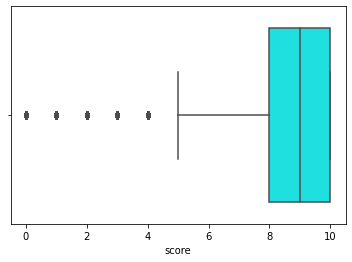

Boxplot of score
Q1 is :  8.0
Q2 is :  9.0
Q3 is :  10.0
IQR is: 2.0
Lower Whisker, Upper Whisker :  5.0 , 13.0
number of outliers are: 147884


In [ ]:
# 9. Check for outliers and impute them as required. 
# only score is the column which is numeric so we check it for outliers.
#Checking for outliers in the sample of 1000000
sns.boxplot(x= d_df['score'], color='cyan')
plt.show()
print('Boxplot of score')
#calculating the outiers in attribute 
Q1 = d_df['score'].quantile(0.25)
Q2 = d_df['score'].quantile(0.50)
Q3 = d_df['score'].quantile(0.75) 
IQR = Q3 - Q1
L_W = (Q1 - 1.5 *IQR)
U_W = (Q3 + 1.5 *IQR)    
print('Q1 is : ',Q1)
print('Q2 is : ',Q2)
print('Q3 is : ',Q3)
print('IQR is:',IQR)
print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
bools = (d_df['score'] < (Q1 - 1.5 *IQR)) |(d_df['score'] > (Q3 + 1.5 * IQR))
print('number of outliers are:',bools.sum())   #calculating the number of outliers

There are 147884 outliers in the column score

In [ ]:
#  function to treat outliers
#Removing outliers by removing data below lower whisker and above upper whisker
Q1 = d_df['score'].quantile(0.25)
Q3 = d_df['score'].quantile(0.75)
IQR = Q3 - Q1
d_df = d_df[(d_df['score'] > (Q1 - 1.5 *IQR)) & (d_df['score'] < (Q3 + 1.5 *IQR))]
bools = (d_df['score'] < (Q1 - 1.5 *IQR)) |(d_df['score'] > (Q3 + 1.5 * IQR))
print('number of outliers are:',bools.sum())   #calculating the number of outliers
d_df.shape

number of outliers are: 0


(848829, 3)

In [ ]:
# 10. Try cross validation techniques to get better results.
cross_validate(algo,data_U, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([2.54241054, 2.60754486, 2.68258383]),
 'fit_time': (0.4840667247772217, 0.4601907730102539, 0.4766719341278076),
 'test_time': (0.017716169357299805,
  0.017461776733398438,
  0.01641249656677246)}

 7. Report your findings and inferences.
Samsung Galaxy Note5 is the most popular product 
Amazon Customer is the most active author who writes reviews.
Lenovo Vibe K4 Note (White,16GB) was rated by most of the authors
CV rmse was 2.5

10. In what business scenario you should use popularity based Recommendation Systems ? 
Ans. Popularity based recommendation system relies on the popularity,trends and frequency counts of which items were most purchased.It is used buy the travel companies selling holiday packages in a season, by Google News and other news websites to show Top Stories with images.


11.  In what business scenario you should use CF based Recommendation Systems ? 
Ans. Collaborative Filtering is used to building intelligent recommender systems that can learn to give better recommendations as more information about users is collected. It isa personalised recommender system , recommendations are made based on the past behaviour of the user. Most websites like Amazon, YouTube, and Netflix use collaborative filtering as a part of their sophisticated recommendation system.

12.  What other possible methods can you think of which can further improve the recommendation for diﬀerent users ?
Ans. Apart from Popularity and Collaborative Filtering , Content-based, Demographic, Utility based, Knowledge based and Hybrid recommendation system can be used as per the user needs.